## Most optimal skills

<h3 style="margin-top: 5px; margin-bottom: 6px;">Question to Answer</h3>
<p style="font-size:15px; margin-top: 0; margin-bottom: 16px;">

<b>What are the optimal skills for data analysts to learn? (High Demand AND High Paying)</b>
</p>

<h4>Methodology — Skill Demand vs. Salary</h4>

<ol>
  <li>Filter data for the selected role (e.g., <code>Data Analyst</code>).</li>
  <li>Group by skill to find job count and mean salary.</li>
  <li>Select top 10 skills by job count.</li>
  <li>Plot a scatter of job count vs. mean salary with skill labels.</li>
</ol>


### Importing Libraries and Dataset
<hr>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# importing cleaned dataset
df = pd.read_csv('data_cleaned_jobs.csv')
df.head()

# data parsing
df['job_posted_date'] = pd.to_datetime(df.job_posted_date).dt.date
df['job_skills'] = df['job_skills'].apply(lambda skills: ast.literal_eval(skills) if pd.notna(skills) else skills)

### Skills count and mean salary
<hr>

In [29]:
# selecting job role
job_role = 'Data Analyst'
df_filtered = df[df.job_title_short == job_role]

# exploding the skills list
df_exploded = df_filtered[df_filtered.job_skills.notna()].explode('job_skills', ignore_index=True)

df_scatter_data = (df_exploded.groupby('job_skills')
                  .agg({
                     'job_title':'count',
                     'salary_year_avg':'mean'
                  }).rename(columns={'salary_year_avg': 'mean salary', 'job_title': 'job count'})
                  .sort_values(by='job count', ascending=False)
                  .head(10)
)
      
df_scatter_data

,job count,mean salary
job_skills,,
sql,29029,92543.978317
excel,23526,90959.494454
tableau,16480,92996.190152
python,15831,93601.259891
sas,11552,91187.078360
r,10380,92785.417267
power bi,10071,91377.376037
word,6579,90436.080992
powerpoint,6100,91065.312778


### Plotting the graph
<hr>

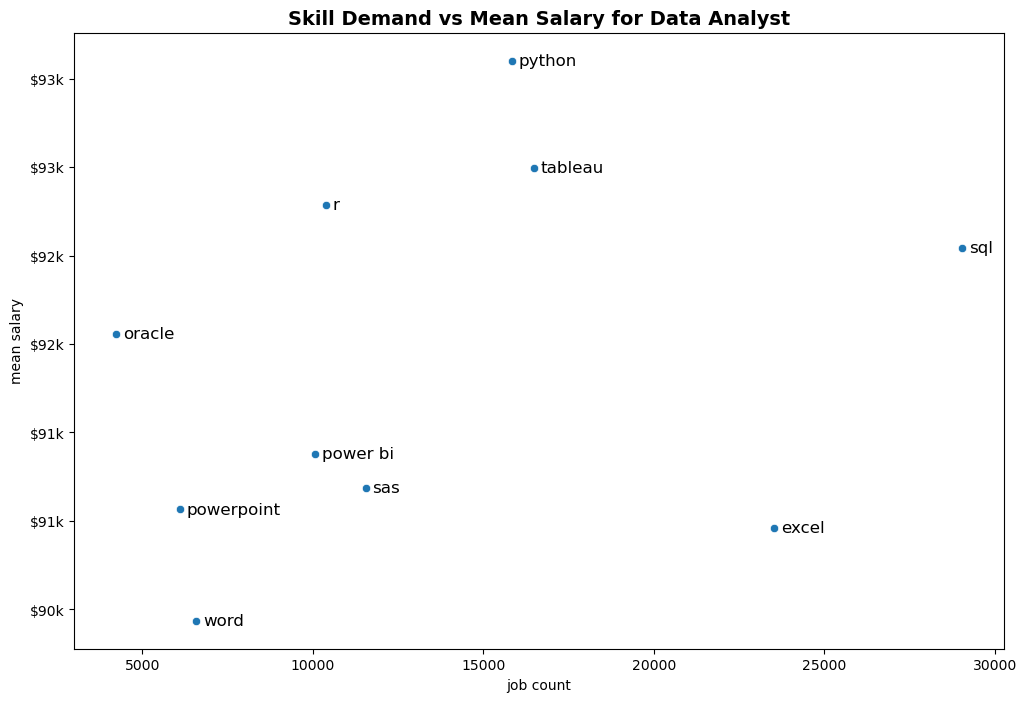

In [38]:
# plotting scatter plot
sns.scatterplot(data=df_scatter_data, x='job count', y='mean salary')

for i, skill in enumerate(df_scatter_data.index):
   xpoint = df_scatter_data.iloc[i,0]
   ypoint = df_scatter_data.iloc[i,1]
   plt.text(xpoint+200, ypoint, skill, fontsize=12, ha='left', va='center')

plt.gcf().set_size_inches(12, 8)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))
plt.title(f"Skill Demand vs Mean Salary for {job_role}", fontsize=14, fontweight='bold')
plt.show()